In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
report_df = pd.read_excel("Calls For Service.xlsx")
report_df.head()

,Date,Time,DOW,CAD Call Number,Sectr,RA,Incident Type,Location,Unit ID
0,2023-01-01 00:00:00,00:02:00,Sunday,PP23010100000009,B51,228.0,DISORDERLY,5910 87th Ave,PP/NC10
1,2023-01-01 00:00:00,00:22:00,Sunday,PP23010100000102,B51,228.0,DISORDERLY,6403 Fairborn Ter,PP/NC10
2,2023-01-01 00:00:00,01:02:00,Sunday,PP23010100000195,B51,229.0,NOISE COMPLAINT,6001 84th Ave,PP/NC19
3,2023-01-01 00:00:00,01:18:00,Sunday,PP23010100000228,B51,228.0,DISORDERLY,Fairbanks St / Carrollton Pkwy,PP/NC19
4,2023-01-01 00:00:00,01:24:00,Sunday,PP23010100000239,B51,229.0,UNKNOWN TROUBLE,8500 Annapolis Rd Wb Apt 909,NaN


In [34]:
report_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9307 entries, 0 to 9306
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             9307 non-null   object 
 1   Time             9306 non-null   object 
 2   DOW              9306 non-null   object 
 3   CAD Call Number  9306 non-null   object 
 4   Sectr            9306 non-null   object 
 5   RA               9306 non-null   float64
 6   Incident Type    9306 non-null   object 
 7   Location         9306 non-null   object 
 8   Unit ID          5777 non-null   object 
dtypes: float64(1), object(8)
memory usage: 654.5+ KB


In [37]:
incident_counts = report_df.groupby(["Date", "Incident Type"]).size().reset_index(name = "Count")
most_frequent_incidents = pd.DataFrame(incident_counts.loc[incident_counts.groupby("Date")['Count'].idxmax()])

most_frequent_incidents


,Date,Incident Type,Count
0,2023-01-01,911 DISCONNECT,11
22,2023-01-02,DISORDERLY,4
30,2023-01-03,911 DISCONNECT,5
46,2023-01-04,911 DISCONNECT,3
60,2023-01-05,911 DISCONNECT,5
...,...,...,...
5241,2023-12-26,PREMISE CHECK,6
5250,2023-12-27,PREMISE CHECK,14
5266,2023-12-28,PREMISE CHECK,11
5283,2023-12-29,PREMISE CHECK,15


In [50]:
most_frequent_incidents['Date'] = pd.to_datetime(most_frequent_incidents['Date'])

# Extract month from the 'Date' column
most_frequent_incidents['Month'] = most_frequent_incidents['Date'].dt.month
monthly_counts = most_frequent_incidents.groupby(['Month', 'Incident Type'])['Count'].sum().reset_index()
print(monthly_counts)

# Pivot the table to have incident types as columns
pivot_table = monthly_counts.pivot(index='Month', columns='Incident Type', values='Count').fillna(0)
palette = sns.color_palette("tab20", n_colors=len(pivot_table.columns))

    Month         Incident Type  Count
0       1        911 DISCONNECT    109
1       1            DISORDERLY     16
2       1  MISC POLICE INCIDENT      7
3       1            STOLEN VEH      3
4       1       THEFT FROM AUTO      5
..    ...                   ...    ...
77     12  MISC POLICE INCIDENT     13
78     12         PREMISE CHECK     91
79     12            STOLEN VEH      5
80     12      T - Traffic Stop      8
81     12       UNKNOWN TROUBLE      3

[82 rows x 3 columns]


                              Month         Incident Type  Count
typing.Literal[<no_default>]                                    
0                                 1        911 DISCONNECT    109
1                                 1            DISORDERLY     16
2                                 1  MISC POLICE INCIDENT      7
3                                 1            STOLEN VEH      3
4                                 1       THEFT FROM AUTO      5
5                                 1       UNKNOWN TROUBLE      5


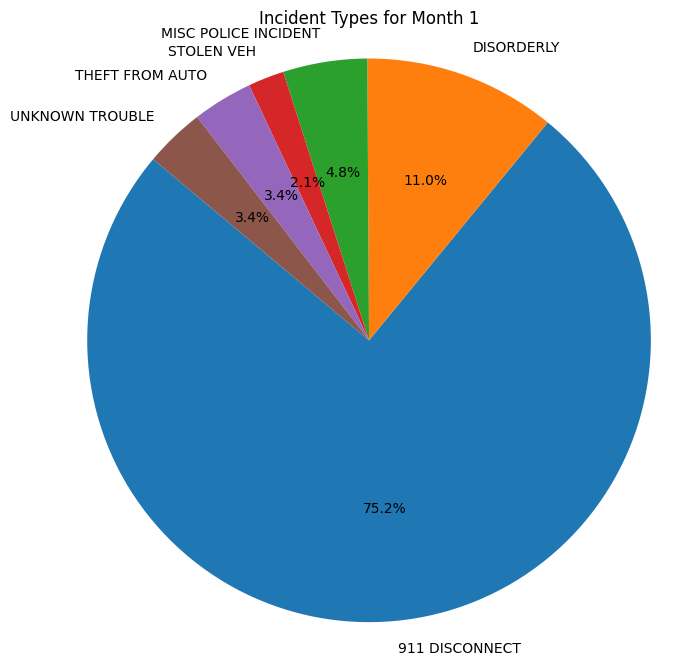

                              Month         Incident Type  Count
typing.Literal[<no_default>]                                    
6                                 2        911 DISCONNECT     79
7                                 2         CHECK WELFARE      3
8                                 2  MISC POLICE INCIDENT      5
9                                 2         PREMISE CHECK     13
10                                2     SUSPICIOUS PERSON      5
11                                2      T - Traffic Stop      6
12                                2       UNKNOWN TROUBLE     17


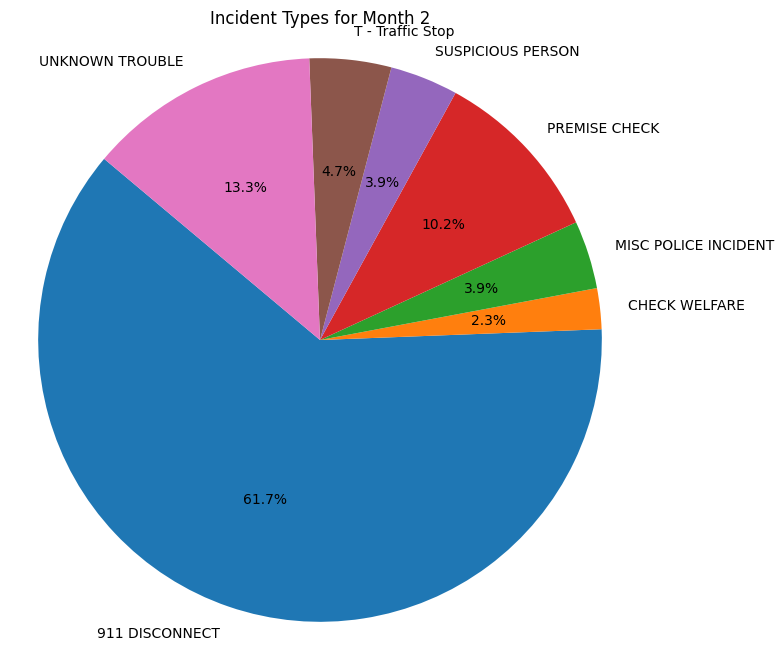

                              Month         Incident Type  Count
typing.Literal[<no_default>]                                    
13                                3        911 DISCONNECT    100
14                                3              ACCIDENT      2
15                                3         CHECK WELFARE      5
16                                3  LOUD MUSIC COMPLAINT      6
17                                3         PREMISE CHECK     25
18                                3       UNKNOWN TROUBLE     14


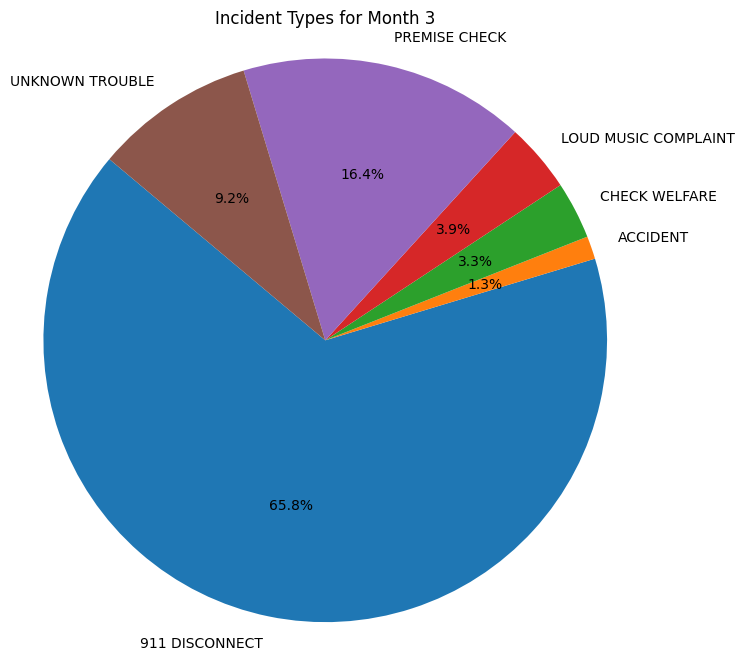

                              Month         Incident Type  Count
typing.Literal[<no_default>]                                    
19                                4        911 DISCONNECT    104
20                                4            DISORDERLY     17
21                                4  LOUD MUSIC COMPLAINT      5
22                                4  MISC POLICE INCIDENT      6
23                                4       UNKNOWN TROUBLE     20


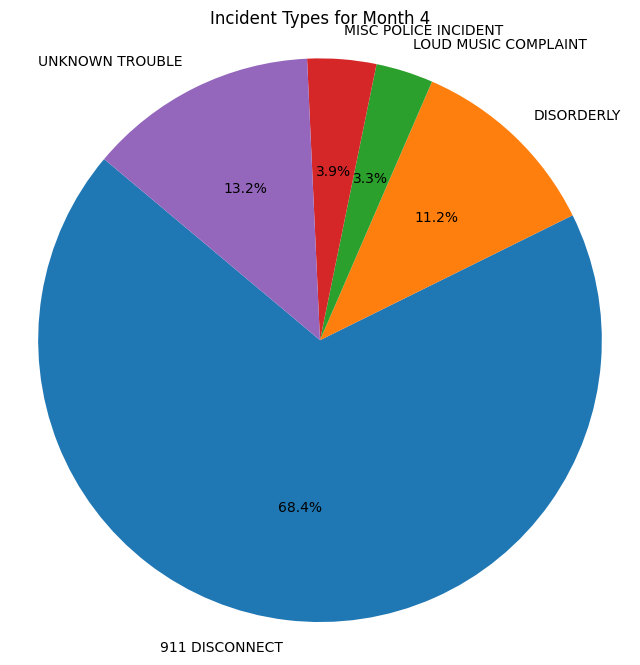

                              Month         Incident Type  Count
typing.Literal[<no_default>]                                    
24                                5        911 DISCONNECT    156
25                                5            DISORDERLY      5
26                                5  LOUD MUSIC COMPLAINT      6
27                                5            STOLEN VEH      5
28                                5       UNKNOWN TROUBLE     13


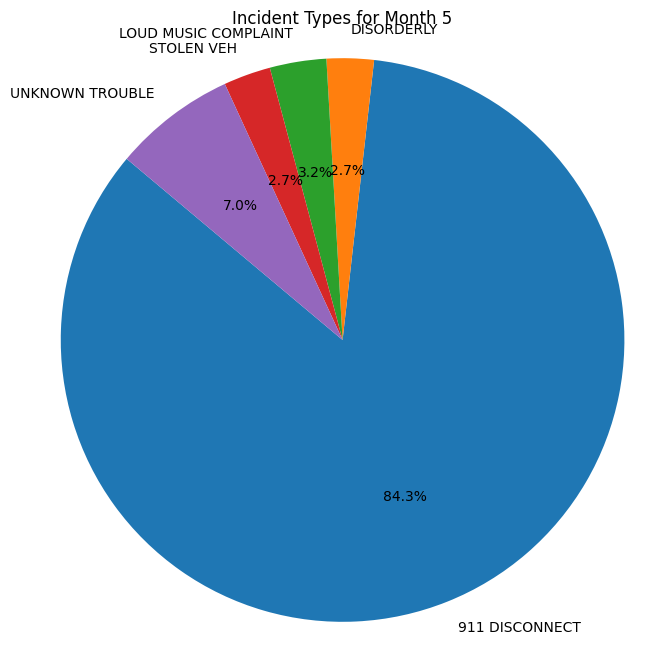

                              Month         Incident Type  Count
typing.Literal[<no_default>]                                    
29                                6        911 DISCONNECT    124
30                                6              ACCIDENT      9
31                                6            DISORDERLY     13
32                                6  LOUD MUSIC COMPLAINT      6
33                                6  MISC POLICE INCIDENT      5
34                                6       UNKNOWN TROUBLE     15


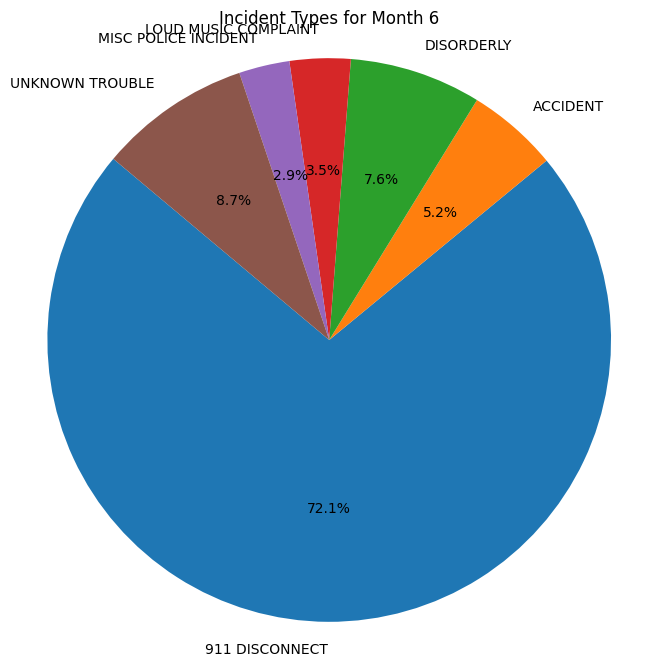

                              Month         Incident Type  Count
typing.Literal[<no_default>]                                    
35                                7        911 DISCONNECT    135
36                                7         CHECK WELFARE      6
37                                7            DISORDERLY     15
38                                7  MISC POLICE INCIDENT      4
39                                7         PREMISE CHECK      8
40                                7            STOLEN VEH      6
41                                7             VANDALISM      7


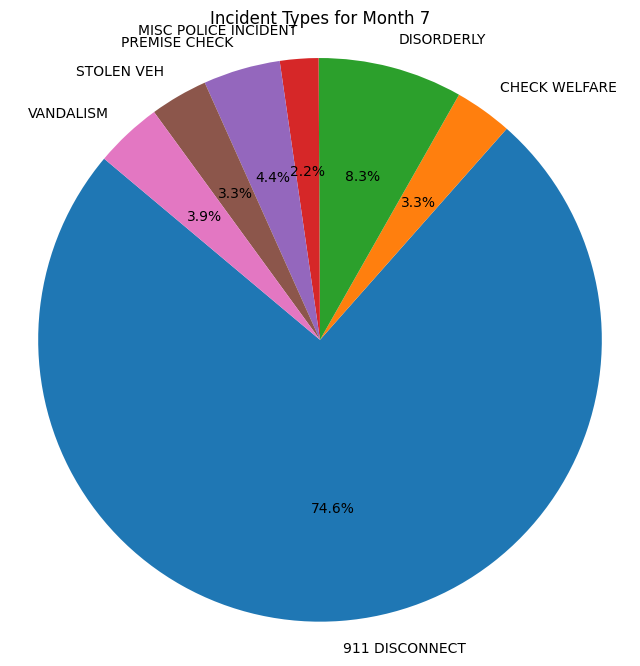

                              Month         Incident Type  Count
typing.Literal[<no_default>]                                    
42                                8        911 DISCONNECT     74
43                                8              ACCIDENT      6
44                                8          ARMED PERSON      2
45                                8            DISORDERLY     11
46                                8              DOMESTIC      5
47                                8  LOUD MUSIC COMPLAINT     12
48                                8  MISC POLICE INCIDENT      8
49                                8         PREMISE CHECK     10
50                                8            STOLEN VEH      4
51                                8      T - Traffic Stop      5


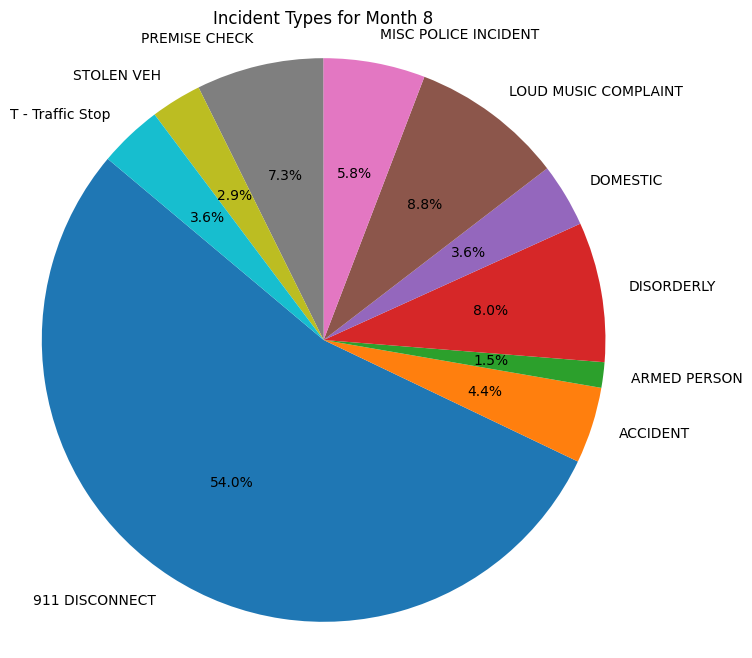

                              Month      Incident Type  Count
typing.Literal[<no_default>]                                 
52                                9     911 DISCONNECT    117
53                                9         DISORDERLY     17
54                                9      PREMISE CHECK     35
55                                9  TRESPASSING COMPL      3
56                                9    UNKNOWN TROUBLE      9


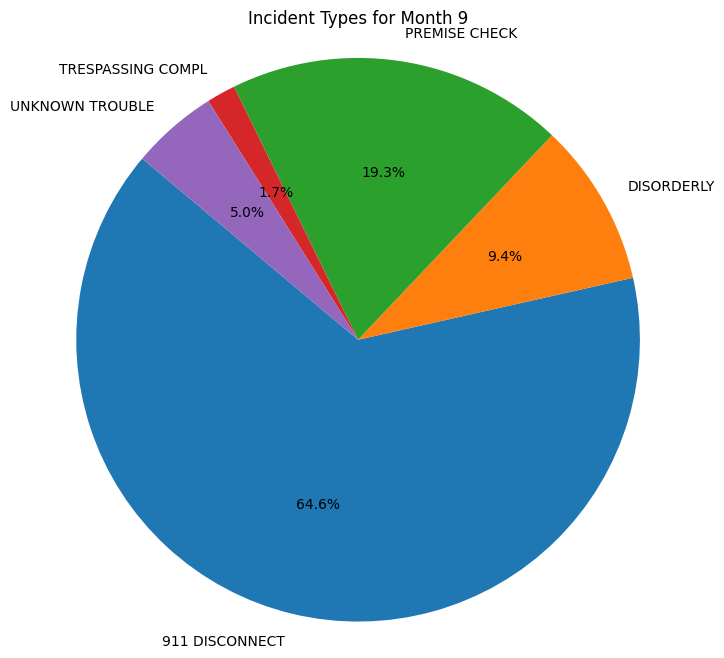

                              Month         Incident Type  Count
typing.Literal[<no_default>]                                    
57                               10        911 DISCONNECT     60
58                               10              ACCIDENT     11
59                               10            DISORDERLY      3
60                               10              DOMESTIC      5
61                               10  LOUD MUSIC COMPLAINT      8
62                               10  MISC POLICE INCIDENT      5
63                               10         PREMISE CHECK     15
64                               10      T - Traffic Stop     37
65                               10          THEFT REPORT      2
66                               10       UNKNOWN TROUBLE      5


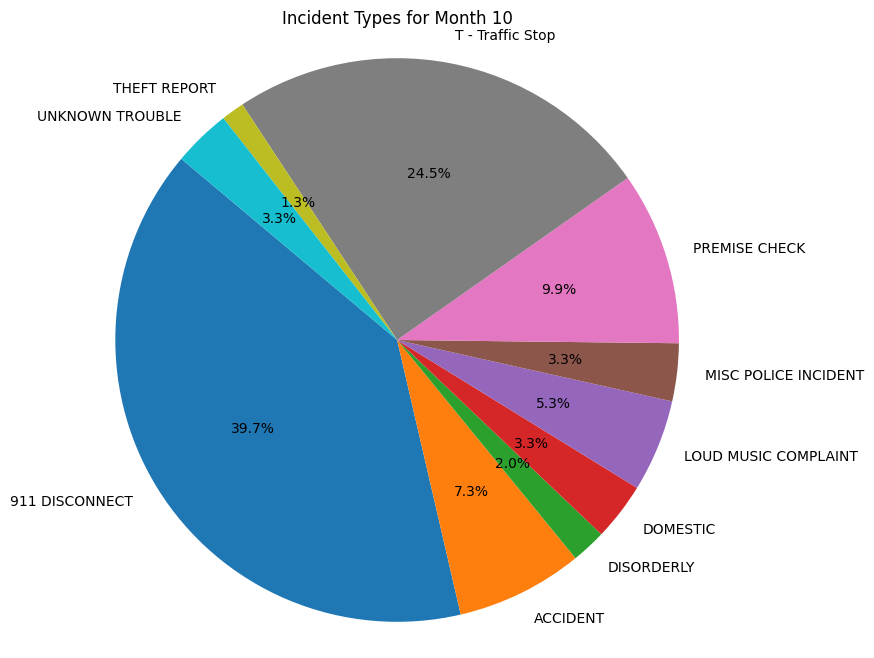

                              Month         Incident Type  Count
typing.Literal[<no_default>]                                    
67                               11        911 DISCONNECT     88
68                               11            DISORDERLY     14
69                               11  MISC POLICE INCIDENT      7
70                               11         PREMISE CHECK     18
71                               11            STOLEN VEH      8
72                               11      T - Traffic Stop      3
73                               11       THEFT FROM AUTO      8
74                               11             VANDALISM      5


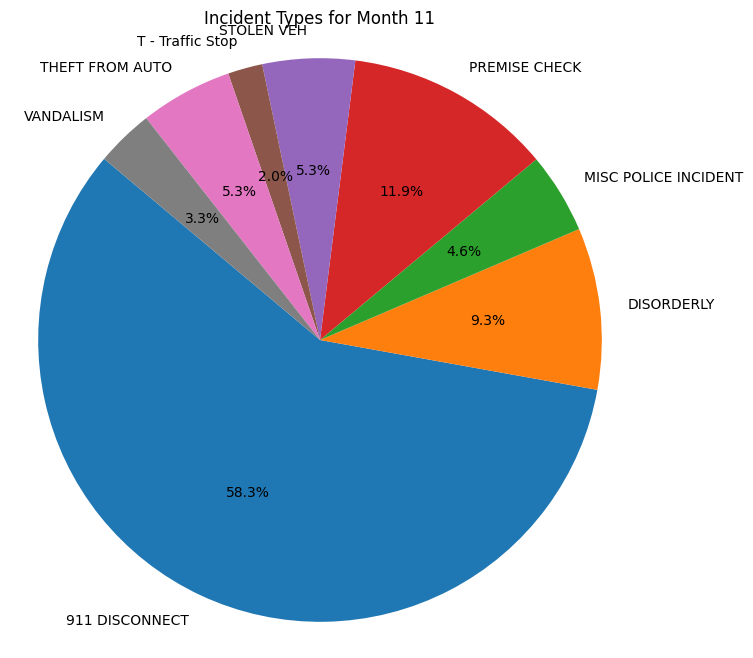

                              Month         Incident Type  Count
typing.Literal[<no_default>]                                    
75                               12        911 DISCONNECT     39
76                               12            DISORDERLY     32
77                               12  MISC POLICE INCIDENT     13
78                               12         PREMISE CHECK     91
79                               12            STOLEN VEH      5
80                               12      T - Traffic Stop      8
81                               12       UNKNOWN TROUBLE      3


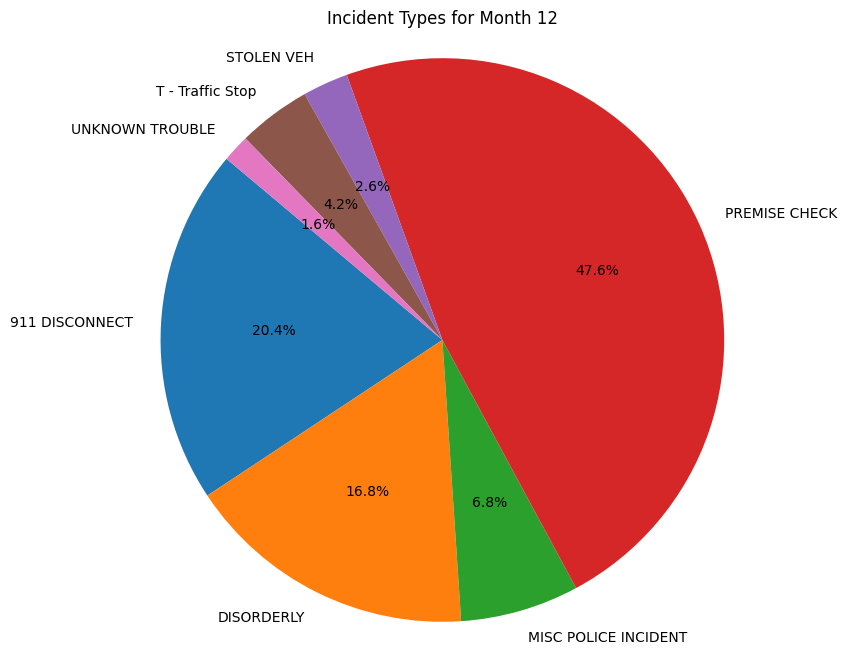

In [52]:
for month in monthly_counts['Month'].unique():
    # Filter data for the current month
    data_month = monthly_counts[monthly_counts['Month'] == month]
    print(data_month)
    
    # Create a pie chart for the current month
    plt.figure(figsize=(8, 8))
    plt.pie(data_month['Count'], labels=data_month['Incident Type'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Incident Types for Month {month}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

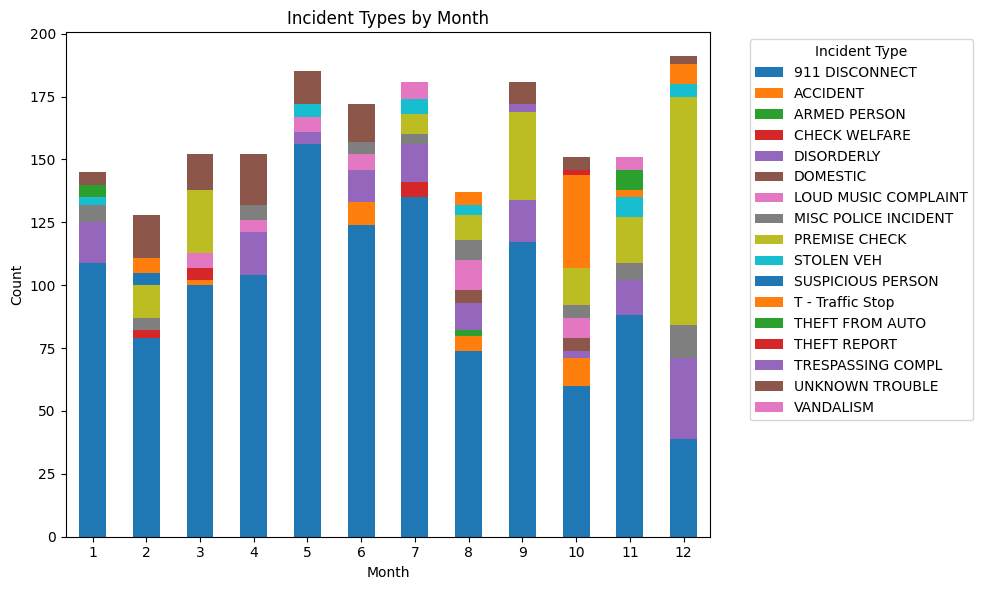

In [46]:
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Incident Types by Month')
plt.legend(title='Incident Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

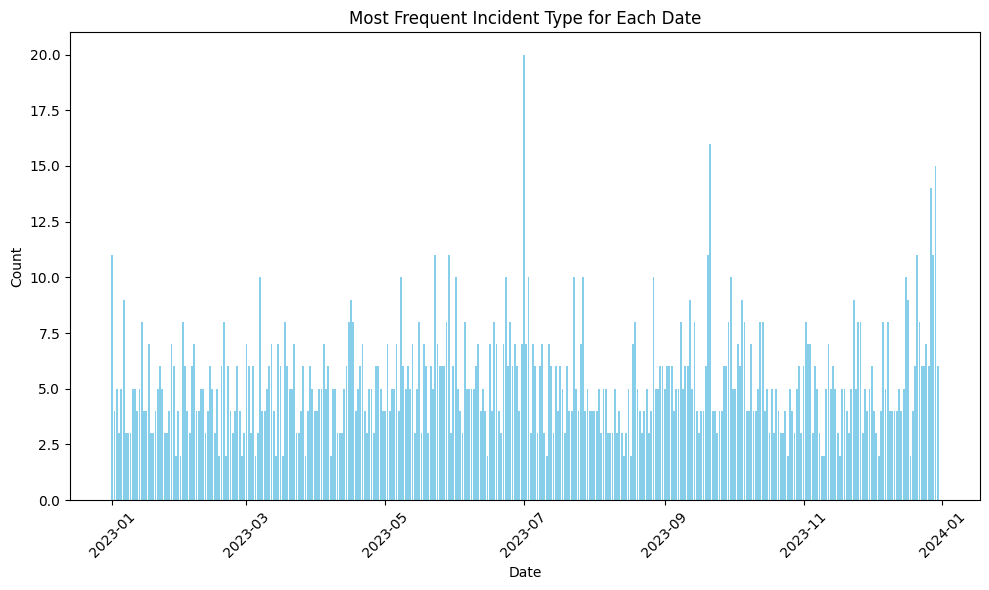

In [41]:
most_frequent_incidents = most_frequent_incidents.sort_values(by='Date')

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(most_frequent_incidents['Date'], most_frequent_incidents['Count'])
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Most Frequent Incident Type for Each Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()